# Properties of the Sine Map

In this notebook we are going to be exploring the properties of chaos in a Sine Map. We have already looked at the Chaos with a logistic map with an equation of $$x_{n+1}=4rx_n(1-x_n)$$ In this notebook we will be looking at a map function with the equation  $$x_{n+1}=r\sin(\pi x_n)$$

In [3]:
#Packages Needed
import numpy as np
import matplotlib.pyplot as plt
from sympy import *


## Introducting the Sine Function

First we are going plot each map function and compare the sine function we will be using to the logistic equation that represents population. 

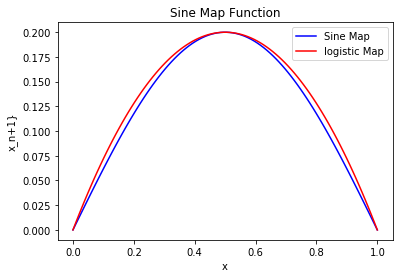

In [4]:
r = 0.2 #0<r<1
x = np.linspace(0,1,100) #0<x<1
xmaps = r*np.sin(np.pi*x)#Map Sine
xmap = 4*r*x*(1-x)#Map logistic


plt.figure()
plt.title("Sine Map Function")
plt.plot(x,xmaps,"b-", label="Sine Map")
plt.plot(x,xmap,"r-", label="logistic Map")
plt.xlabel("x")
plt.ylabel("x_n+1}")
plt.legend(loc="upper right")
plt.show()


As it can be seen from the plot above that the logistic and Sine map behave very similalry and each hit a peak at the selected r value. This shows that the Sine funcion we will be using should create a bifurcation diagram similar to one obtained for the logistic map

Functions needed in program:

In [15]:
def map_func(xn, r):
    #input: x_n  value of x at the nth iteration
    #output: x_n+1  next value of x
    
    x_npo = r*np.sin(np.pi*xn)#Map Sine #map function
    
    return x_npo

In [16]:
def trajectory(x_0=0, r=0, N=30):
    xn_all = [] #list to store all values of x_n
    xn_all.append(x_0) #append initial value
    n_all = []
    n_all.append(0)

    n = 0 #loop variable
    while n < N:
        xn = xn_all[n]
        x_nplusone = map_func(xn, r) #calculate x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)

        n = n + 1
    
    return xn_all

In [17]:
def traj_end(x0=0, r=0, Ntotal=1000, Nlast=100):
    xn_end = [] #list to store all values of x_n after n=Ntotal-Nlast
    xn = x0
    n = 0 #loop variable
    while n < Ntotal:
        x_npo = map_func(xn, r) #calculate x_n+1
        if n > Ntotal-Nlast-1:
            xn_end.append(x_npo)
        xn = x_npo
        n = n + 1

    return xn_end

In [80]:
#def plot_bifurcation(x0=0.5, Ntotal = 1000, Nend = 100, rmin = 0.7, rmax = 1, ymin = 0,ymax = 1, plotattractors=True):

  #  xoffset = 0.02 #offset for text on plot
    
   ##plt.title("x_n after the initial transient")

    #for r in np.linspace(rmin,rmax,1000):
     #   xn=traj_end(x0,r,Ntotal,Nend)
       # rh = r*np.ones(Nend)
        
       
        
        #plt.plot(rh,xn,"b,")

    #if(plotattractors):
       # for i in range(0,len(attractors)):
            #print("r_%d: %.3f" % (i+1,attractors[i]))
            #plt.axvline(x=attractors[i])
            #if(i<3):
                #plt.text(attractors[i]-xoffset, xoffset, "r_%d" % (i+1))
            #else:
                #plt.text(attractors[i]+0.5*xoffset, xoffset, "r_%d" % (i+1))                
    ##plt.ylabel("x_n")
    #plt.ylim(ymin, ymax)
    #plt.show()

In [154]:
def plot_bifurcation_A(x0=0.5, Ntotal = 1000, Nend = 100, rmin = 0.7, rmax = 1, ymin = 0,ymax = 1, plotattractors=True):

    xoffset = 0.02 #offset for text on plot
    
    plt.figure()
    plt.title("x_n after the initial transient")

    for r in np.linspace(rmin,rmax,1000):
        xn=traj_end(x0,r,Ntotal,Nend)
        rh = r*np.ones(Nend)
        
        plt.plot(rh,xn,"b,")

    if(plotattractors):
        for i in range(0,len(attractors)):
            print("r_%d: %.3f" % (i+1,attractors[i]))
            plt.axvline(x=attractors[i])
            if(i<3):
                plt.text(attractors[i]-xoffset, xoffset, "r_%d" % (i+1))
            else:
                plt.text(attractors[i]+0.5*xoffset, xoffset, "r_%d" % (i+1))                
    plt.xlabel("r")
    plt.ylabel("x_n")
    plt.ylim(ymin, ymax)
    plt.show()

In [160]:
def traj(x_0=0, r=0, N=30, linetype="r.", ymin=0, ymax=0):
    xn_all = [] #list to store all values of x_n
    xn_all.append(x_0) #append initial value
    n_all = []
    n_all.append(0)

    n = 0 #loop variable
    while n < N:
        xn = xn_all[n]
        x_nplusone = map_func(xn, r) #calculate x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)

        n = n + 1

    print("Stable Point: ", xn,x_nplusone)
    plt.plot(n_all,xn_all,linetype, label="x_0 = %.4f, r = %.4f" % (x_0, r))
    

   
    
    

## Determining Steady X Values

Now we are explore the fixed point of the sine map to determine the x values that become steady before the function bifurcates at certain r values. To do this we are going to plot $x_{n+1}$ vs n and see what r values create a split in the line and approach more steady points.

In [161]:
%matplotlib notebook

<IPython.core.display.Javascript object>


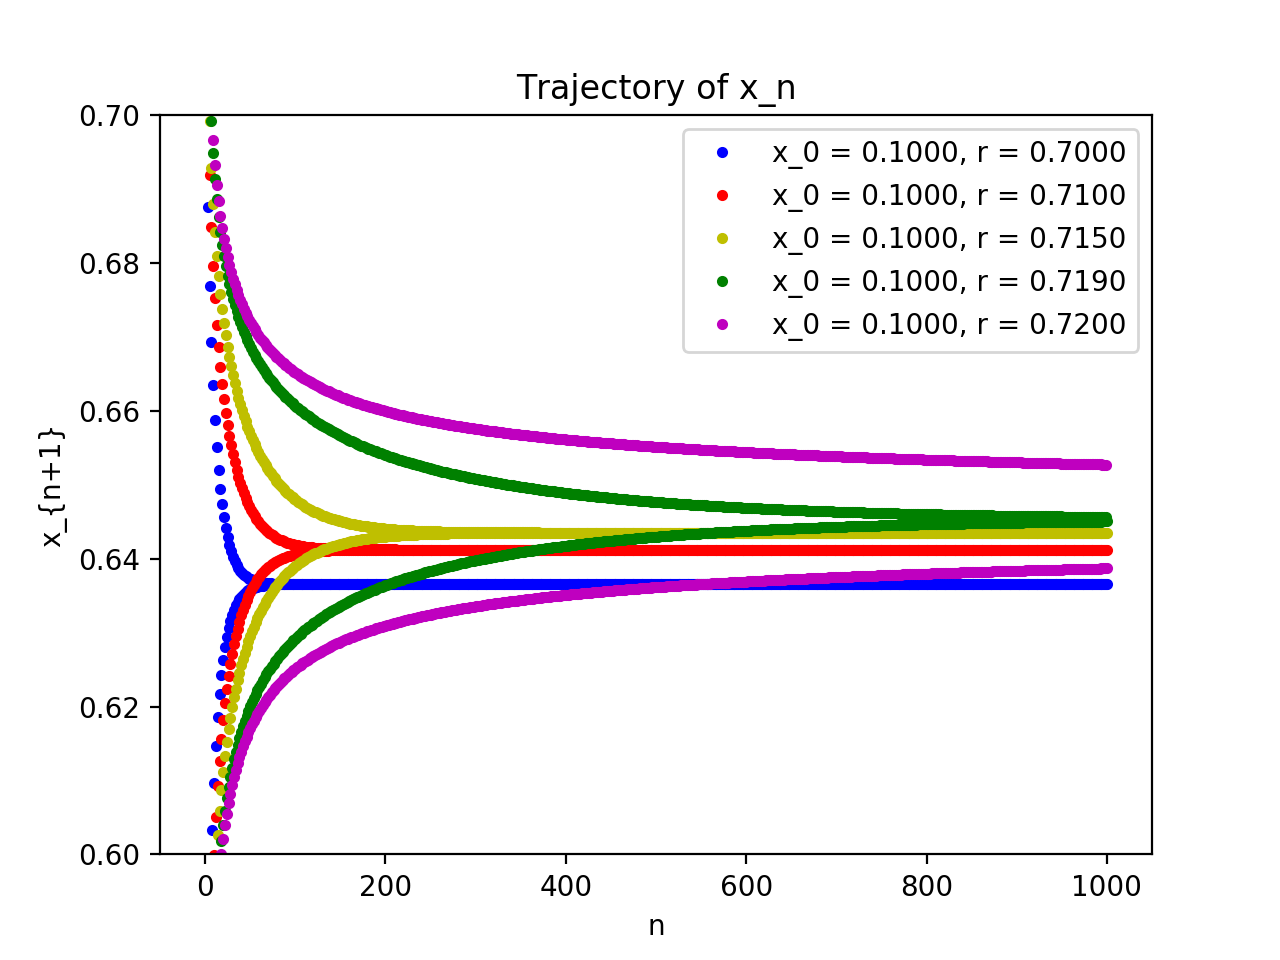

Stable Point:  0.6365615085347793 0.6365615085347786
Stable Point:  0.6412423960874436 0.64124239608744
Stable Point:  0.6435327949615656 0.6435327949198015
Stable Point:  0.6456439314866556 0.6450406077654478
Stable Point:  0.6527299773980121 0.6386977178299373


In [162]:
plt.figure()
plt.title("Trajectory of x_n")
plt.xlabel("n")
plt.ylabel("x_{n+1}")

traj(0.1,.70,1000,'b.',0,1)
traj(0.1,.71,1000,'r.',0,1)
traj(0.1,.715,1000,'y.',0,1)
traj(0.1,.719,1000,'g.',0,1)
traj(0.1,.72,1000,'m.',0,1)
plt.legend(loc="upper right")
plt.ylim(.6,.7)
plt.show()

In [142]:
global r1 #We define these r values as global so if need be we can use them anywhere else in the program
r1=.72

It can be observed for when r=.72 that the last two stable points are different while the stable points corresponding to the other r values pretty much stay the same. This shows that the Sine Map bifurcates at r=.72 and gives us stable points at .653 and .638. While for an r value less than .72 the x value approaches .645.

<IPython.core.display.Javascript object>


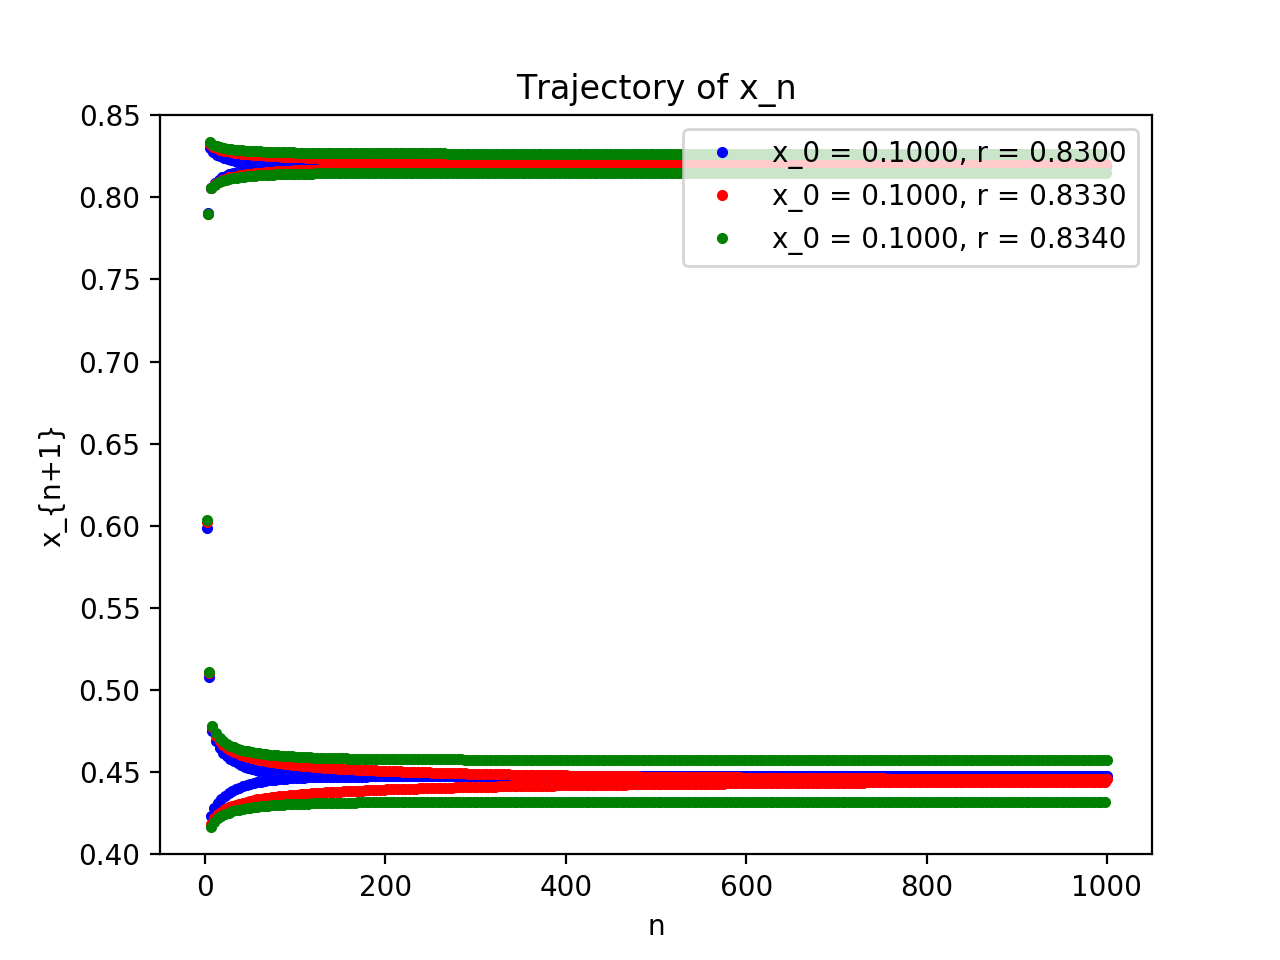

Stable Point:  0.8187395779140987 0.4475076957179009
Stable Point:  0.8203105430159188 0.4456573441255207
Stable Point:  0.8151035270620997 0.4576582932153427


In [164]:
plt.figure()
plt.title("Trajectory of x_n")
plt.xlabel("n")
plt.ylabel("x_{n+1}")
traj(0.1,.83,1000,'b.',0,1)
traj(0.1,.833,1000,'r.',0,1)
traj(0.1,.834,1000,'g.',0,1)
plt.legend(loc="upper right")
plt.ylim(.4,.85)
plt.show()


This chart like the last shows us the next r value at which the sine map bifurcates. This R value is 8.34 and it approaches four stable points, two of which are .815 and .4577

In [169]:
global r2
r2=.834

<IPython.core.display.Javascript object>


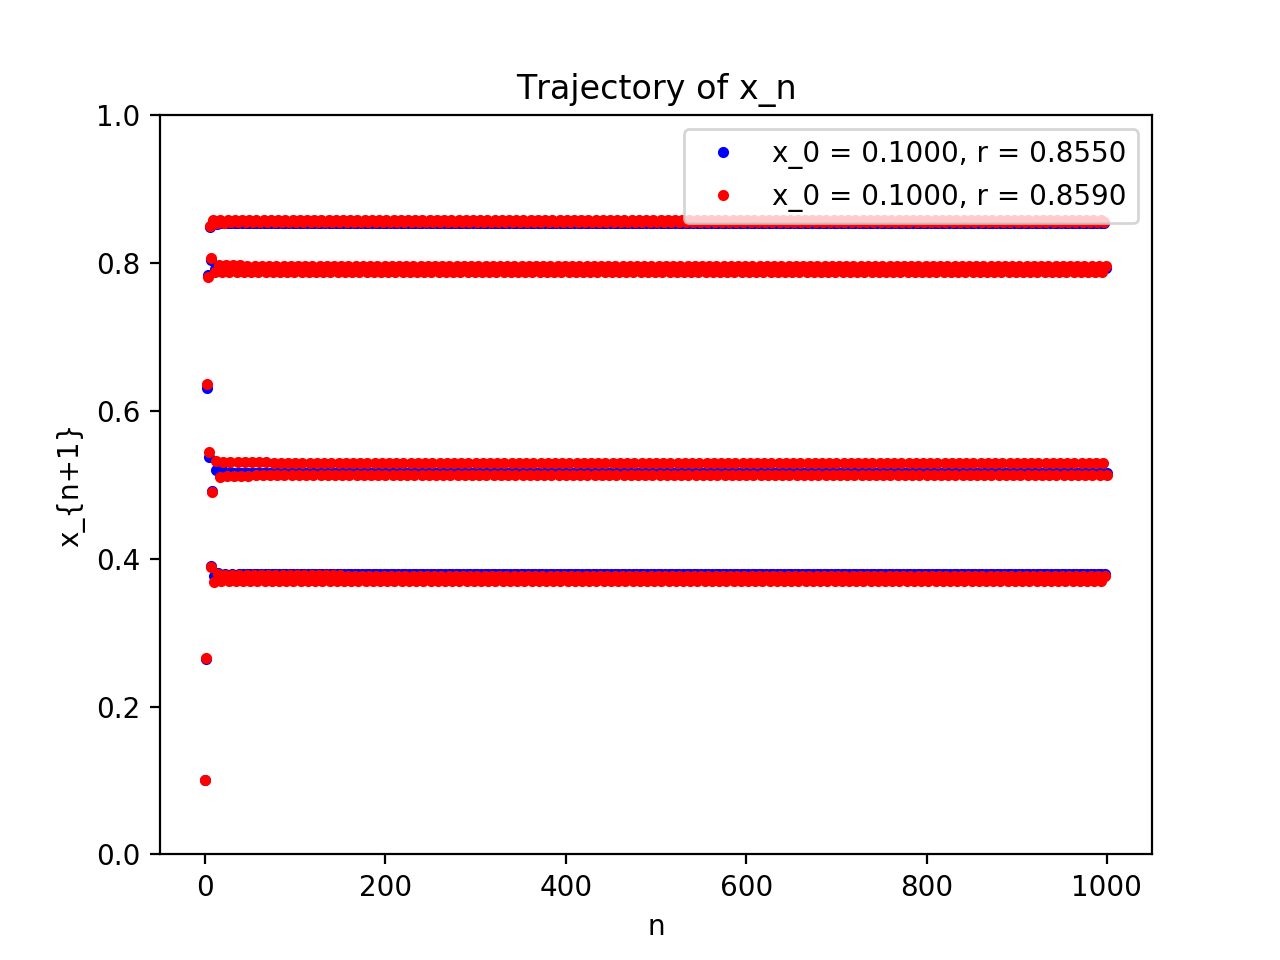

Stable Point:  0.7937385582431503 0.516064834303917
Stable Point:  0.7958931781694399 0.5138314211534403


In [166]:
plt.figure()
plt.title("Trajectory of x_n")
plt.xlabel("n")
plt.ylabel("x_{n+1}")
traj(0.1,.855,1000,'b.',0,1)
traj(0.1,.859,1000,'r.',0,1)
#traj(0.1,.86,1000,'g.',0,1)
plt.legend(loc="upper right")
plt.ylim(0,1)
plt.show()



This shows us the the sine map bifurcates once again at an $r =.859$

In [167]:
global r3
r3=.859

<IPython.core.display.Javascript object>


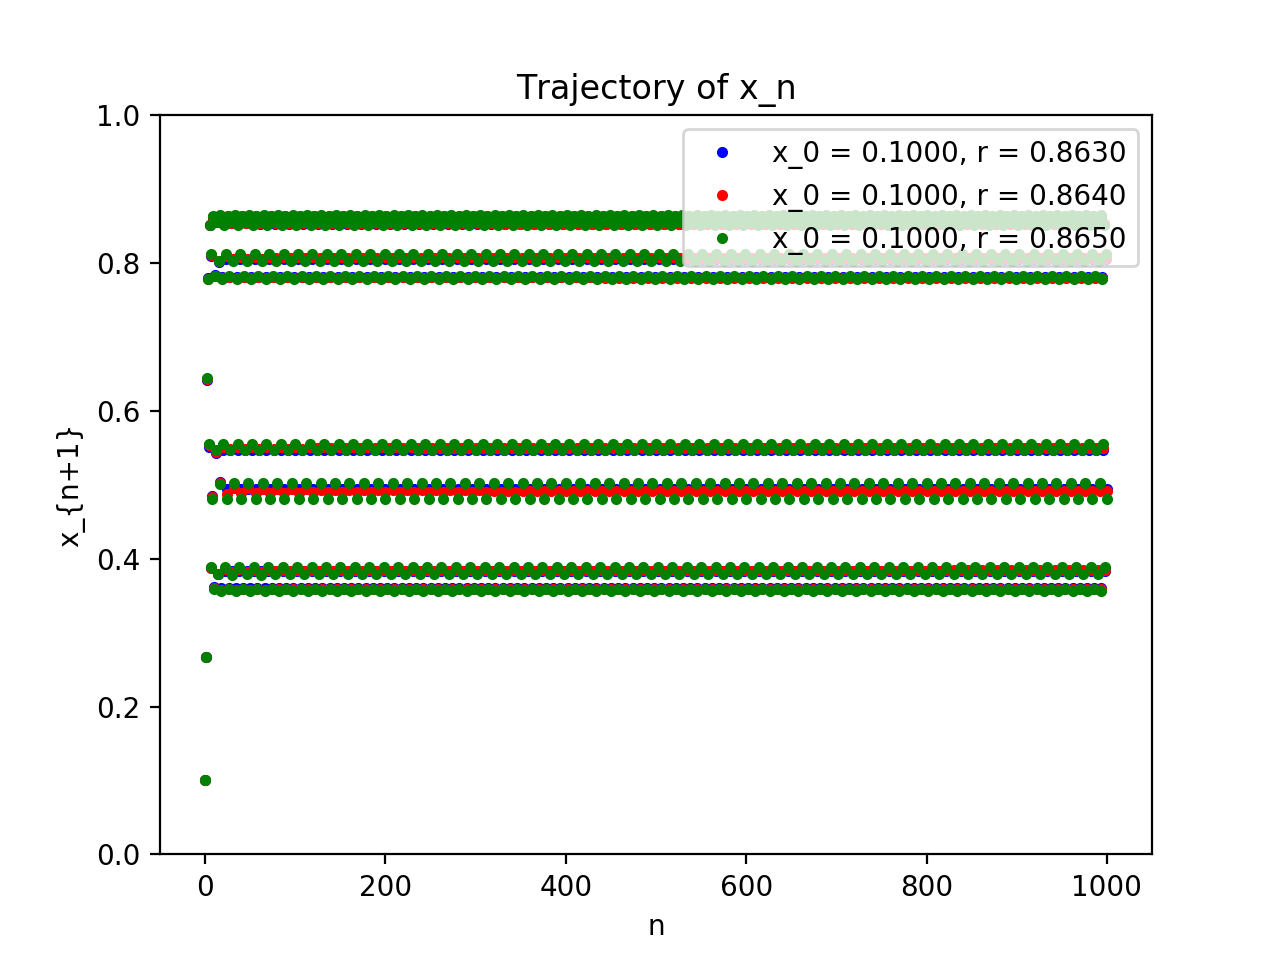

Stable Point:  0.805748763440986 0.49456728179050713
Stable Point:  0.8073783253194803 0.49150909330908493
Stable Point:  0.8122046505257549 0.481235386758282


In [168]:
plt.figure()
plt.title("Trajectory of x_n")
plt.xlabel("n")
plt.ylabel("x_{n+1}")
traj(0.1,.863,1000,'b.',0,1)
traj(0.1,.864,1000,'r.',0,1)
traj(0.1,.865,1000,'g.',0,1)
plt.legend(loc="upper right")
plt.ylim(0,1)
plt.show()


Once again this plot shows that the Map function bifuractes for a fourth time at $r=.865$

In [170]:
global r4
r4=.865

<IPython.core.display.Javascript object>


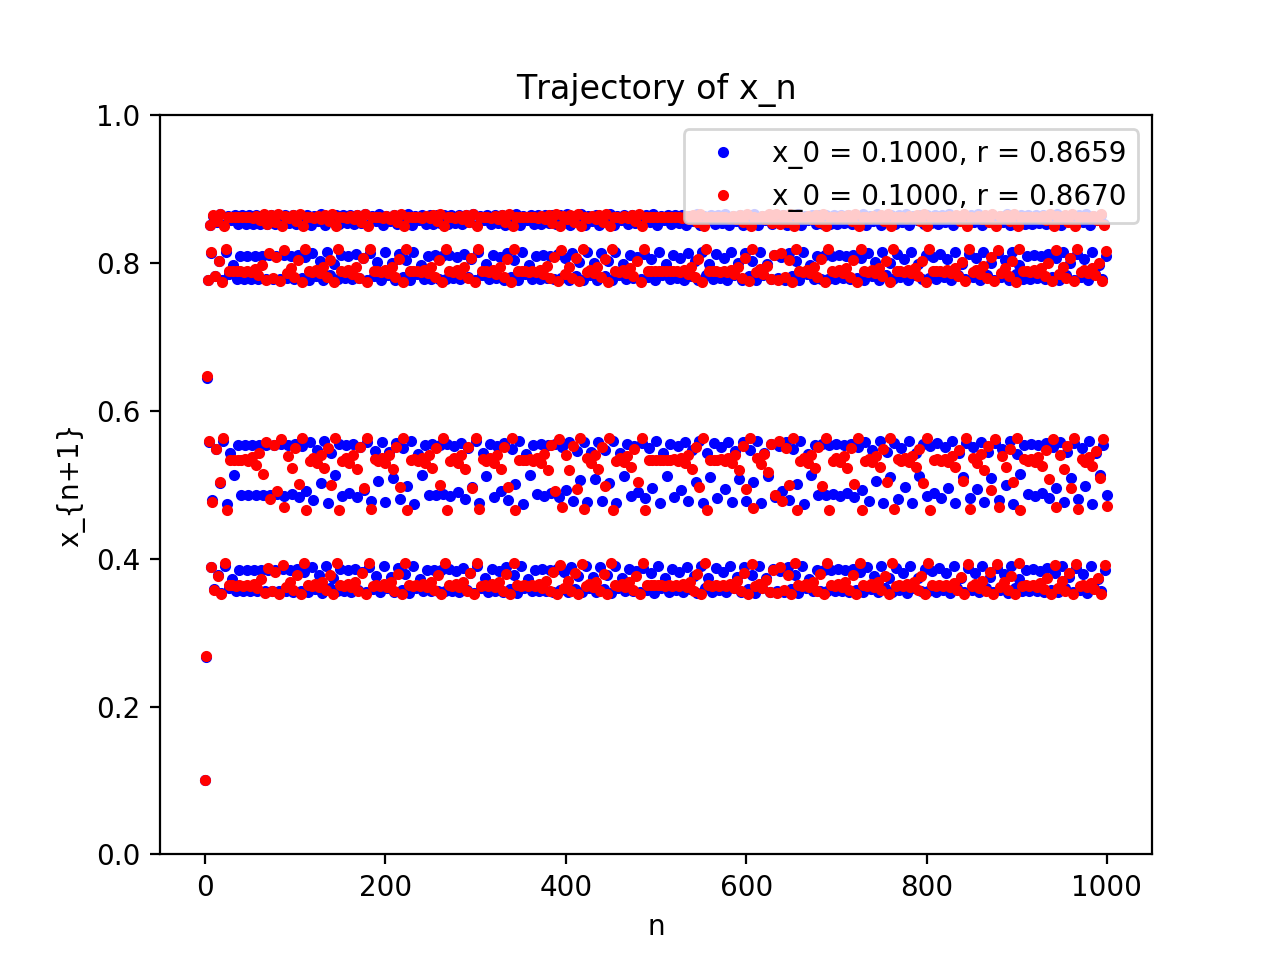

Stable Point:  0.486338744532442
Stable Point:  0.47168102481004653


In [149]:
plt.figure()
plt.title("Trajectory of x_n")
plt.xlabel("n")
plt.ylabel("x_{n+1}")
traj(0.1,.8659,1000,'b.',0,1)
traj(0.1,.867,1000,'r.',0,1)
#traj(0.1,.88,1000,'g.',0,1)
plt.legend(loc="upper right")
plt.ylim(0,1)
plt.show()


This plot shows that when $r=.867$ the behavior of the sine map becomes unpredicable and hence becomes chaotic.

## Finding The Feigenbaum Constant

Given all our values for r where the function bifurcates, we are able to determine the Feigenbaum constant of the equation. The Feigenbaum constant represents the ratio in between each bifurcation and can be found by $$\delta = \frac{r_n-r_{n-1}}{r_{n+1}-r_n}$$


In [1]:
rin=.867
feig= (r2-r1)/(r3-r2)
feig

NameError: name 'r2' is not defined

The Feigenbaum number here is equal to 4.56

## Plotting Bifurcation

Given all the information we just obtained by showing what r values cause bifurcation we can show a bifurcation diagram with all the r values that cause a split Once we do that we can compare the x values to the x values we found above to see if what we did was accurate 

In [172]:
attractors=[r1, r2, r3, r4]

<IPython.core.display.Javascript object>


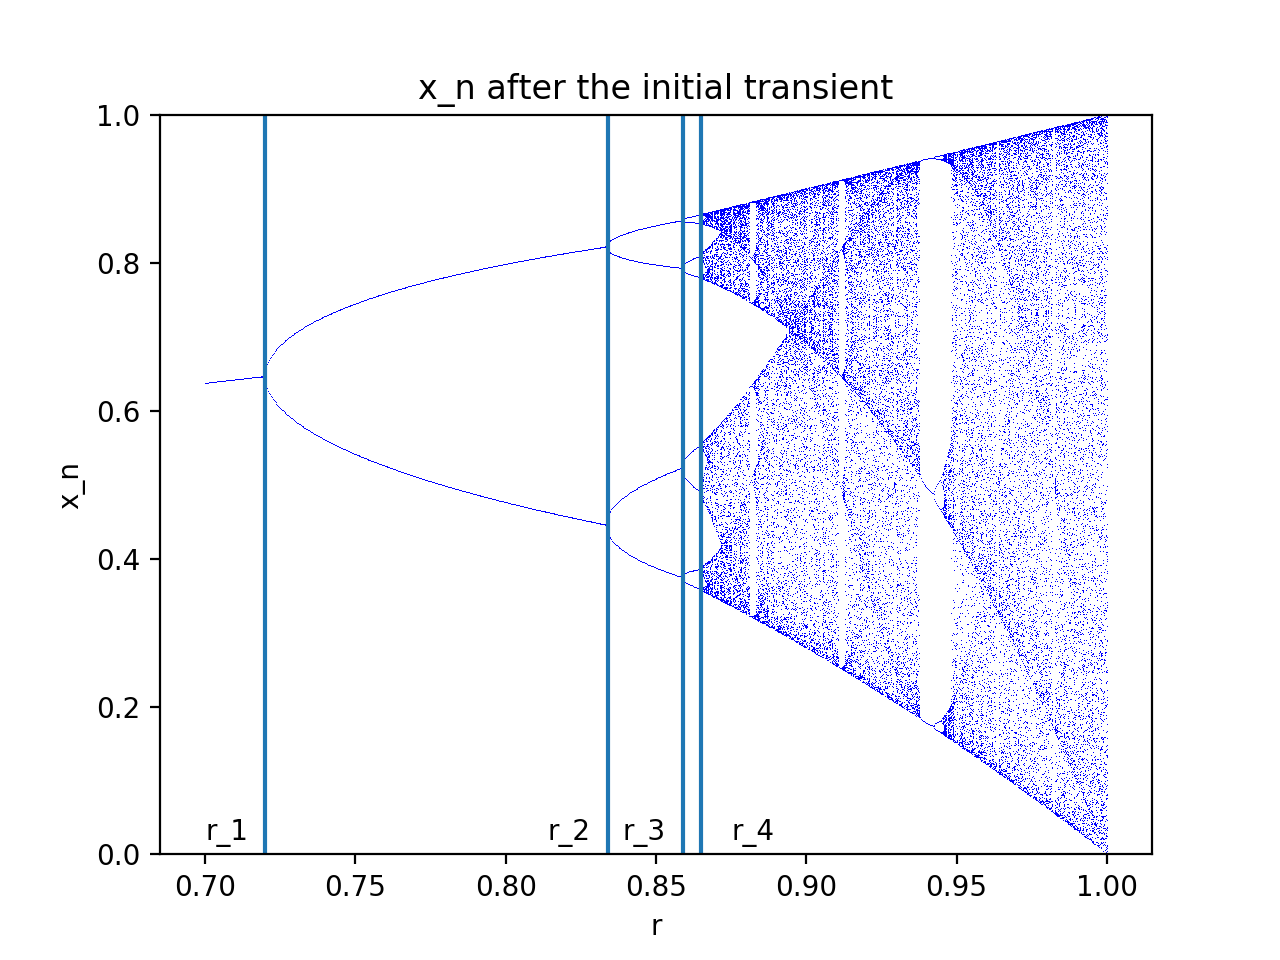

r_1: 0.720
r_2: 0.834
r_3: 0.859
r_4: 0.865


In [173]:
plot_bifurcation_A()

After plotting our bifurcation diagram, it can be seen that the R values we determined before fit to the diagram and the stable points found for the first few bifurcations are also accurate. 


## Comparing Two Different Initial Positions



Next, we are going to see how the plot of x vs n looks for two differnt $x_{0}$ values .001 apart in the chaotic region

<IPython.core.display.Javascript object>


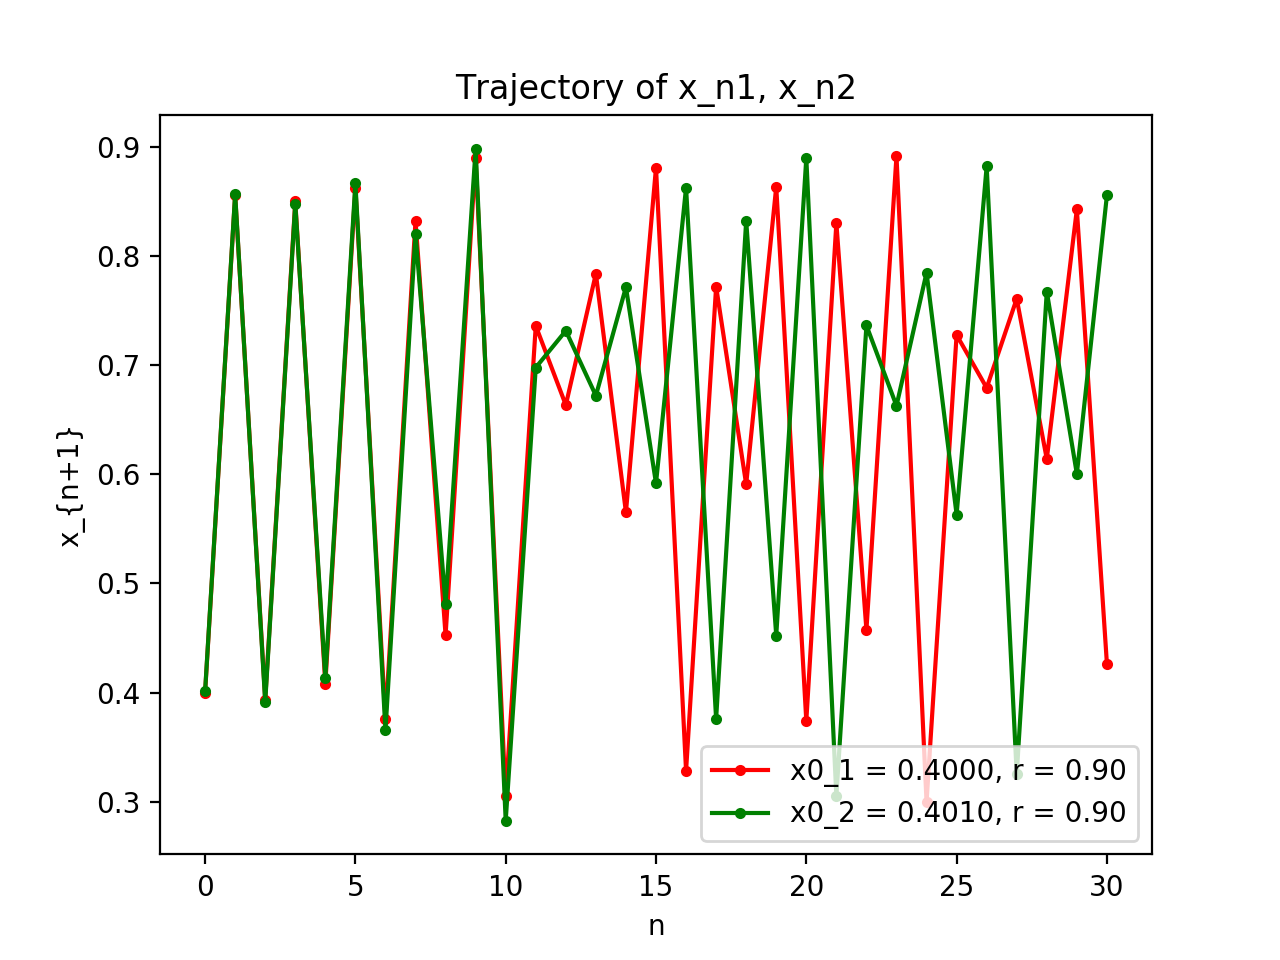

In [174]:
x0_1=0.4
x0_2=x0_1+0.001
r=0.9 #Set r at .9 because it is clearly in the Chaotic zone
N=30

xn_1=trajectory(x0_1, r, N)
xn_2=trajectory(x0_2, r, N)
n=np.linspace(0,N,N+1)

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.plot(n,xn_1,"r.-", label="x0_1 = %.4f, r = %.2f" % (x0_1, r))
plt.plot(n,xn_2,"g.-", label="x0_2 = %.4f, r = %.2f" % (x0_2, r))
plt.xlabel("n")
plt.ylabel("x_{n+1}")
plt.legend(loc="lower right")
plt.show()

Now that we have obtained our plot for each x0 it is clear that as n increases the difference in values increases dramatically. Next we are going to plot the difference in between each point for the two paths and apply a curve fit to it to obtain the Lyapunov exponent $\lambda$ which can be found by $$\Delta x \approx c\epsilon e^{\lambda n}$$ If $\lambda<0$, then the system is predictable (nonchaotic). If $\lambda>0$, the system is chaotic. 

<IPython.core.display.Javascript object>


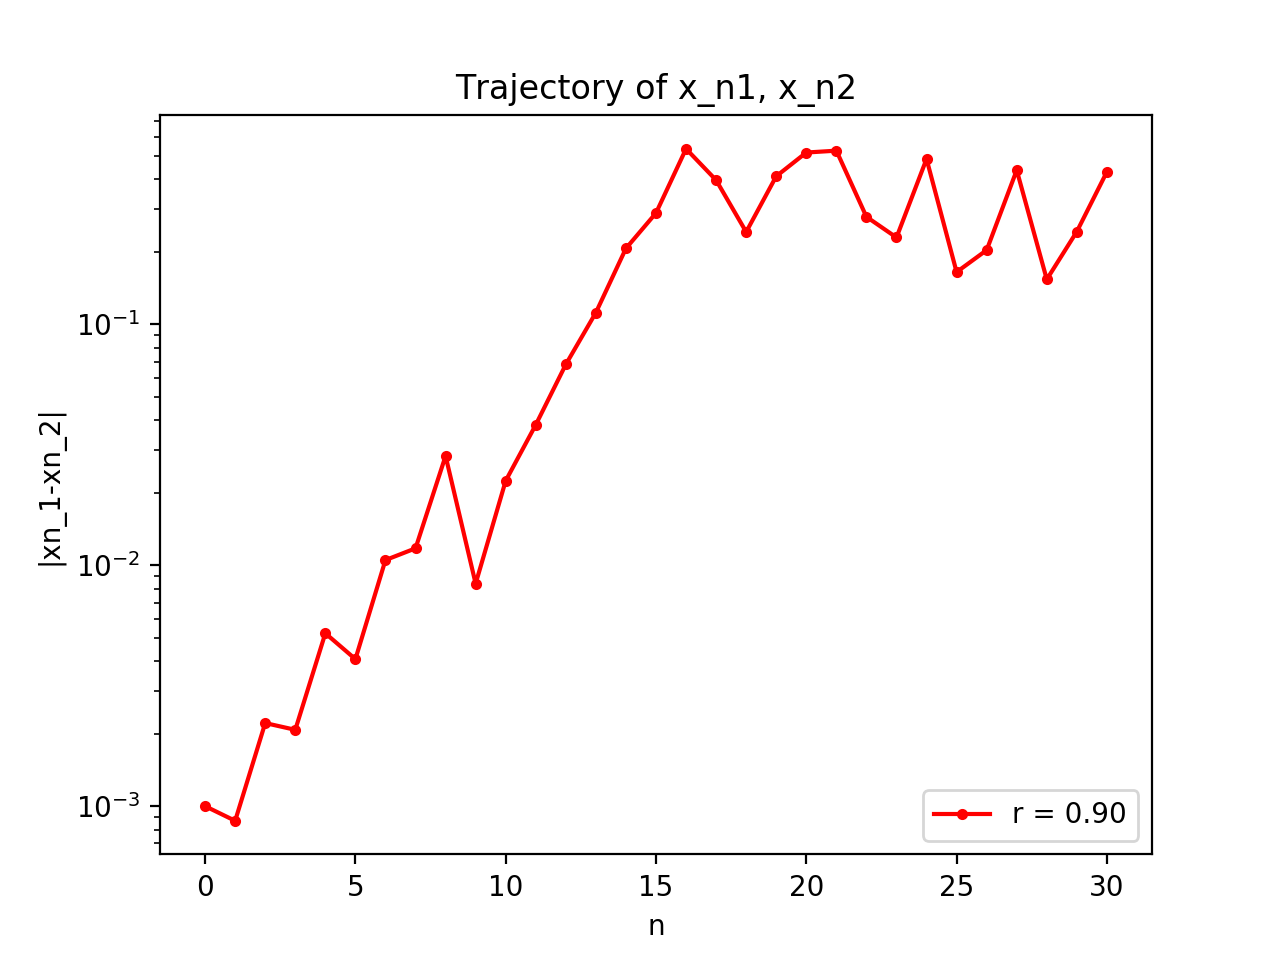

In [57]:
x0_1=0.4
x0_2=x0_1+0.001
r=0.9
N=30

xn_1=np.array(trajectory(x0_1, r, N))
xn_2=np.array(trajectory(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

This graph represents the difference inbetween the two paths. Now to obtain our Lyapunov exponent we apply a curve fit to our graph and find the slope. The slope of this is our Lyapunov exponent value. Since our curve fit doesnt fit the first few points in our data set we can throw out those points and fit the curve to the last 15 points.  

<IPython.core.display.Javascript object>


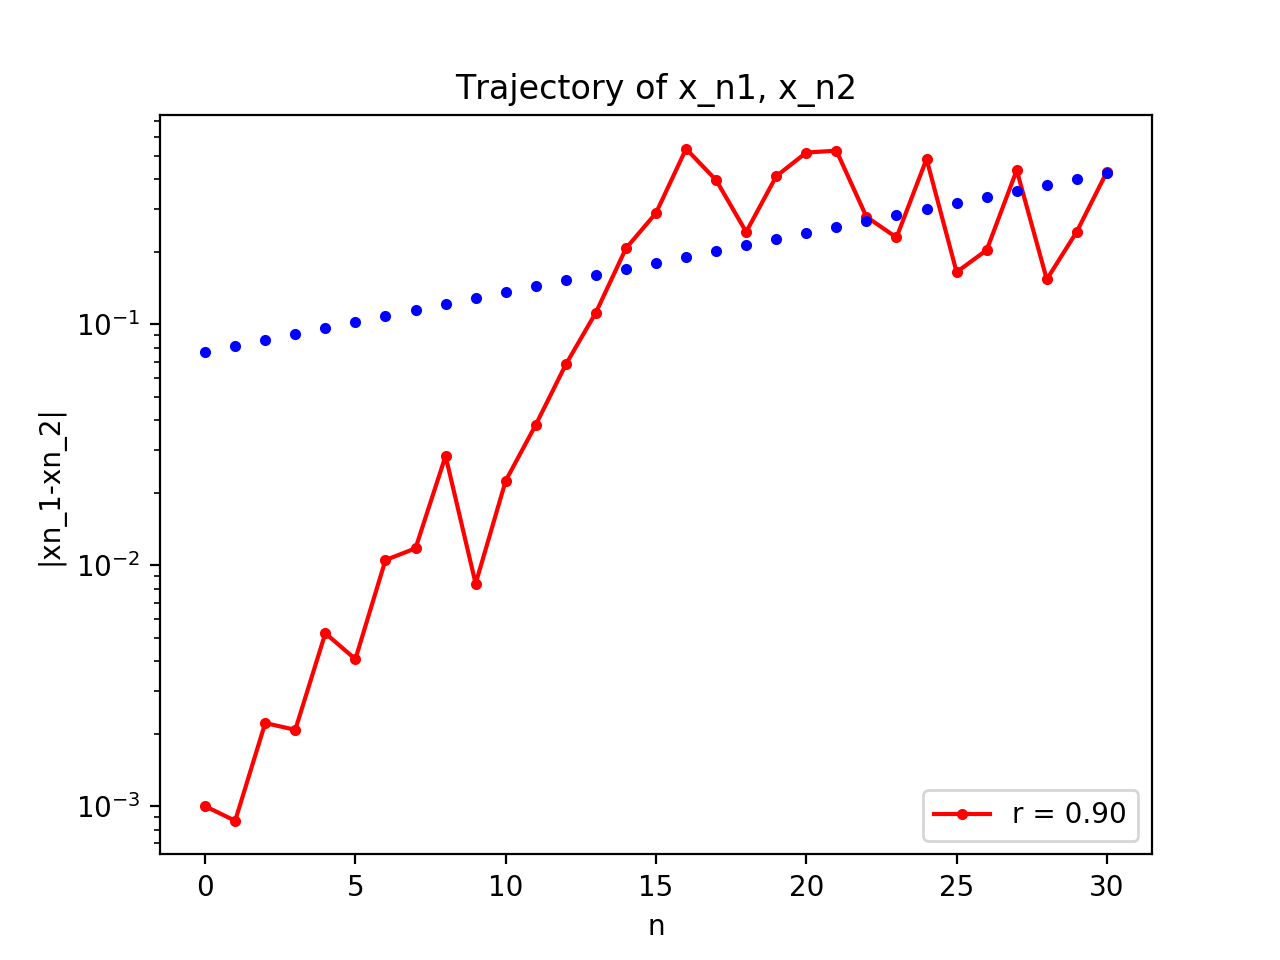

<IPython.core.display.Javascript object>


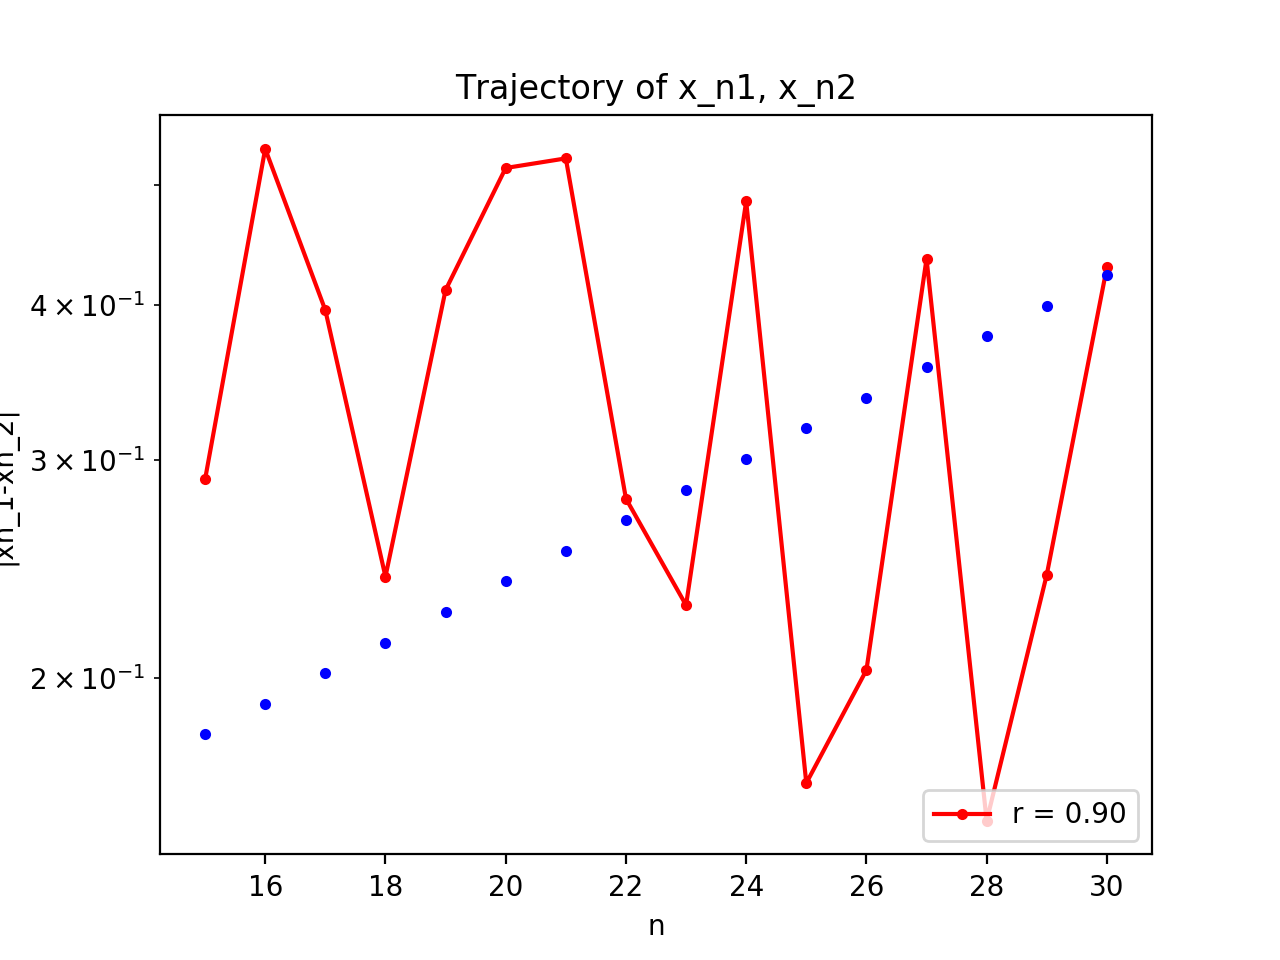

0.01565843656898569


In [63]:

Parameters, stats = curve_fit(Curve, n, dx)

# graph model data with measured dat



dxmodel=Curve(n,*Parameters)

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.semilogy(n,dxmodel,'b.')
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n[15:],dx[15:],"r.-", label="r = %.2f" % (r))
plt.semilogy(n[15:],dxmodel[15:],'b.')
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

print((dxmodel[29]-dxmodel[15])/(n[29]-n[15]))





Here we get a slope of the curve fit equal to .0157 which is greater than zero, which shows once again that we are in a chaotic region as expected from our r value being greater that .867 